In [1]:
import os
import itertools
import glob
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker
import matplotlib.pyplot as plt


sns.set(font_scale=0.9, style='whitegrid', font='CMU Sans Serif')
pal = sns.color_palette(['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB'])
sns.set_palette(pal)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,2)
mpl.rcParams['figure.dpi'] = 100

In [2]:
# types:
# code
# model
# dependencies
# base

In [3]:
trabant = [
    ("code", 6481),
    ("model", 2774868)
]
trabant_compressed = 2575445

In [4]:
# IMAGE          CREATED          CREATED BY                                      SIZE      COMMENT
normal = [
# 78d74ba382c6   24 minutes ago   CMD ["python3" "server.py"]                     0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      24 minutes ago   COPY multiclass.tflite . # buildkit             2.77MB    buildkit.dockerfile.v0
("model", 2.77 * 1e6),
# <missing>      24 minutes ago   COPY fn.py . # buildkit                         6.48kB    buildkit.dockerfile.v0
("code", 6.48 * 1e3),
# <missing>      24 minutes ago   COPY server.py . # buildkit                     2.06kB    buildkit.dockerfile.v0
("code", 2.06 * 1e3),
# <missing>      24 minutes ago   WORKDIR /usr/src/app                            0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      24 minutes ago   RUN /bin/sh -c python3 -m pip install "numpy…   119MB     buildkit.dockerfile.v0
("dependencies", 119 * 1e6),
# <missing>      24 minutes ago   ENV LANG=C.UTF-8                                0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      5 weeks ago      CMD ["python3"]                                 0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      5 weeks ago      RUN /bin/sh -c set -eux;  for src in idle3 p…   36B       buildkit.dockerfile.v0
("base", 36),
# <missing>      5 weeks ago      RUN /bin/sh -c set -eux;   wget -O python.ta…   64.7MB    buildkit.dockerfile.v0
("base", 64.7 * 1e6),
# <missing>      5 weeks ago      ENV PYTHON_VERSION=3.11.10                      0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      5 weeks ago      ENV GPG_KEY=A035C8C19219BA821ECEA86B64E628F8…   0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      5 weeks ago      RUN /bin/sh -c set -eux;  apt-get update;  a…   18.2MB    buildkit.dockerfile.v0
("base", 18.2 * 1e6),
# <missing>      5 weeks ago      ENV LANG=C.UTF-8                                0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      5 weeks ago      ENV PATH=/usr/local/bin:/usr/local/sbin:/usr…   0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      5 weeks ago      /bin/sh -c set -ex;  apt-get update;  apt-ge…   560MB     
("base", 560 * 1e6),
# <missing>      5 weeks ago      /bin/sh -c set -eux;  apt-get update;  apt-g…   183MB     
("base", 183 * 1e6),
# <missing>      5 weeks ago      /bin/sh -c set -eux;  apt-get update;  apt-g…   48.5MB    
("base", 48.5 * 1e6),
# <missing>      5 weeks ago      /bin/sh -c #(nop)  CMD ["bash"]                 0B        
("none", 0),
# <missing>      5 weeks ago      /bin/sh -c #(nop) ADD file:e689b230a6f8e5eb3…   139MB     
("base", 139 * 1e6),
]
# 1160010752
# 413652155

normal_compressed = 413652155

In [5]:
# IMAGE          CREATED          CREATED BY                                      SIZE      COMMENT
slim = [
# 135f6c8c7bd8   31 minutes ago   CMD ["python3" "server.py"]                     0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      31 minutes ago   COPY multiclass.tflite . # buildkit             2.77MB    buildkit.dockerfile.v0
("model", 2.77 * 1e6),
# <missing>      31 minutes ago   COPY fn.py . # buildkit                         6.48kB    buildkit.dockerfile.v0
("code", 6.48 * 1e3),
# <missing>      31 minutes ago   COPY server.py . # buildkit                     2.06kB    buildkit.dockerfile.v0
("code", 2.06 * 1e3),
# <missing>      31 minutes ago   WORKDIR /usr/src/app                            0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      31 minutes ago   RUN /bin/sh -c python3 -m pip install "numpy…   119MB     buildkit.dockerfile.v0
("dependencies", 119 * 1e6),
# <missing>      31 minutes ago   ENV LANG=C.UTF-8                                0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      5 weeks ago      CMD ["python3"]                                 0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      5 weeks ago      RUN /bin/sh -c set -eux;  for src in idle3 p…   36B       buildkit.dockerfile.v0
("base", 36),
# <missing>      5 weeks ago      RUN /bin/sh -c set -eux;   savedAptMark="$(a…   49.2MB    buildkit.dockerfile.v0
("base", 49.2 * 1e6),
# <missing>      5 weeks ago      ENV PYTHON_VERSION=3.11.10                      0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      5 weeks ago      ENV GPG_KEY=A035C8C19219BA821ECEA86B64E628F8…   0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      5 weeks ago      RUN /bin/sh -c set -eux;  apt-get update;  a…   9.17MB    buildkit.dockerfile.v0
("base", 9.17 * 1e6),
# <missing>      5 weeks ago      ENV LANG=C.UTF-8                                0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      5 weeks ago      ENV PATH=/usr/local/bin:/usr/local/sbin:/usr…   0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      5 weeks ago      /bin/sh -c #(nop)  CMD ["bash"]                 0B        
("none", 0),
# <missing>      5 weeks ago      /bin/sh -c #(nop) ADD file:28df1cb6a6576d40b…   97.1MB    
("base", 97.1 * 1e6),
]
# 284257280
# 100473773

slim_compressed = 100473773

In [6]:
# IMAGE          CREATED             CREATED BY                                      SIZE      COMMENT
alpine = [
# d14cc167fe80   31 minutes ago      CMD ["python3" "server.py"]                     0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      31 minutes ago      COPY multiclass.tflite . # buildkit             2.77MB    buildkit.dockerfile.v0
("model", 2.77 * 1e6),
# <missing>      31 minutes ago      COPY fn.py . # buildkit                         6.48kB    buildkit.dockerfile.v0
("code", 6.48 * 1e3),
# <missing>      31 minutes ago      COPY server.py . # buildkit                     2.06kB    buildkit.dockerfile.v0
("code", 2.06 * 1e3),
# <missing>      36 minutes ago      WORKDIR /usr/src/app                            0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      36 minutes ago      COPY /usr/lib/libgcc_s.so.1 /usr/lib/libgcc_…   133kB     buildkit.dockerfile.v0
("dependencies", 133 * 1e3),
# <missing>      36 minutes ago      RUN /bin/sh -c ln -s /usr/lib/libstdc++.so.6…   0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      36 minutes ago      COPY /usr/lib/libstdc++.so.6.0.32 /usr/lib/l…   2.69MB    buildkit.dockerfile.v0
("dependencies", 2.69 * 1e6),
# <missing>      36 minutes ago      COPY /usr/local/ /usr/local/ # buildkit         108MB     buildkit.dockerfile.v0
("dependencies", 108 * 1e6),
# <missing>      About an hour ago   RUN /bin/sh -c apk add --no-cache libbz2 exp…   3.01MB    buildkit.dockerfile.v0
("base", 3.01 * 1e6),
# <missing>      About an hour ago   ENV LANG=C.UTF-8                                0B        buildkit.dockerfile.v0
("none", 0),
# <missing>      5 weeks ago         /bin/sh -c #(nop)  CMD ["/bin/sh"]              0B        
("none", 0),
# <missing>      5 weeks ago         /bin/sh -c #(nop) ADD file:9865d69f45511580c…   7.74MB    
("base", 7.74 * 1e6),
]
# 126930432
# 39421734

alpine_compressed = 39421734

In [7]:
# summarize the data
data_compressed = [
    ("trabant", trabant_compressed),
    ("normal", normal_compressed),
    ("slim", slim_compressed),
    ("alpine", alpine_compressed),
]

data = [
    ("trabant", t, s) for t, s in trabant
] + [
    ("normal", t, s) for t, s in normal
] + [
    ("slim", t, s) for t, s in slim
] + [
    ("alpine", t, s) for t, s in alpine
]

df = pd.DataFrame(data, columns=["image", "type", "size"])

<Axes: xlabel='image', ylabel='size'>

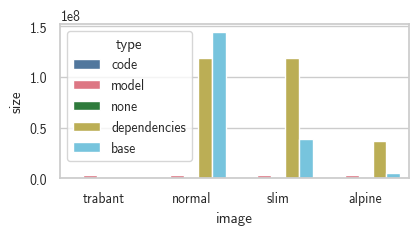

In [8]:
sns.barplot(data=df, x="image", y="size", hue="type", errorbar=None)

Text(0, 0.5, 'deployment size')

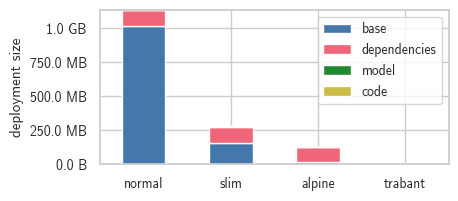

In [9]:
# make a stacked bar plot

from matplotlib import ticker


stacked = df.groupby(["image", "type"]).sum().unstack().fillna(0)

order = ["base", "dependencies", "model", "code"]

stacked = stacked.reindex(order, axis=1, level=1)
x_order = ["normal", "slim", "alpine", "trabant"]
stacked = stacked.reindex(x_order)
g = stacked.plot(kind='bar', stacked=True)

# format the y-axis to use MB
g.yaxis.set_major_formatter(ticker.EngFormatter(unit="B", places=1))

# make the legend labels more readable
g.legend(title=None, labels=["base", "dependencies", "model", "code"])

# make the x-axis labels more readable
g.set_xticklabels(["normal", "slim", "alpine", "trabant"])
# don't rotate the x-axis labels
g.xaxis.set_tick_params(rotation=0)
# no x-axis label
g.set_xlabel("")
# but do have a y-axis label
g.set_ylabel("deployment size")
# plt.savefig("upload_sizes.pdf", bbox_inches='tight')

In [10]:
df.groupby(["image", "type"]).sum()/1e6

size
image   type                     
alpine  base            10.750000
        code             0.008540
        dependencies   110.823000
        model            2.770000
        none             0.000000
normal  base          1013.400036
        code             0.008540
        dependencies   119.000000
        model            2.770000
        none             0.000000
slim    base           155.470036
        code             0.008540
        dependencies   119.000000
        model            2.770000
        none             0.000000
trabant code             0.006481
        model            2.774868

webf NOT subset; don't know how to subset; dropped


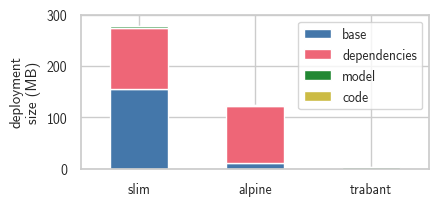

In [11]:
# make a stacked bar plot

from matplotlib import ticker


stacked = df.groupby(["image", "type"]).sum().unstack().fillna(0)

order = ["base", "dependencies", "model", "code"]

stacked = stacked.reindex(order, axis=1, level=1)
x_order = ["slim", "alpine", "trabant"]
stacked = stacked.reindex(x_order)
stacked["size"] = stacked["size"] / 1e6

g = stacked.plot(kind='bar', stacked=True)

# format the y-axis to use MB
# g.yaxis.set_major_formatter(ticker.EngFormatter(unit="B", places=0))

# make the legend labels more readable
g.legend(title=None, labels=["base", "dependencies", "model", "code"])

# make the x-axis labels more readable
g.set_xticklabels(["slim", "alpine", "trabant"])
# don't rotate the x-axis labels
g.xaxis.set_tick_params(rotation=0)
# no x-axis label
g.set_xlabel("")
# but do have a y-axis label
g.set_ylabel("deployment\nsize (MB)")
g.set_ylim(0, 300)
plt.savefig("upload_sizes.pdf", bbox_inches='tight')